In [1]:

import numpy as np 
import pandas as pd

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("dota2Train.csv", header=None)
test_data = pd.read_csv("dota2Test.csv", header=None)

In [4]:
print(train_data.shape)
print(test_data.shape)

(92650, 117)
(10294, 117)


In [5]:
train_data.iloc[:5,:10]

,0,1,2,3,4,5,6,7,8,9
0,-1,223,2,2,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1
2,1,131,2,2,0,0,0,1,0,-1
3,1,154,2,2,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1


In [6]:
train_data.iloc[:,:5].describe()

,0,1,2,3,4
count,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000
mean,0.053038,175.864145,3.317572,2.384587,-0.001630
std,0.998598,35.658214,2.633070,0.486833,0.402004
min,-1.000000,111.000000,1.000000,1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000


In [7]:
test_data.iloc[:,:5].describe()

,0,1,2,3,4
count,10294.000000,10294.000000,10294.000000,10294.000000,10294.000000
mean,0.068972,175.984263,3.341170,2.388576,-0.001554
std,0.997667,35.687654,2.654345,0.488446,0.398186
min,-1.000000,111.000000,1.000000,1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_data.rename(columns = {0:'Class'}, inplace = True)
test_data.rename(columns = {0:'Class'}, inplace = True)

In [10]:
class_fr = train_data.Class.value_counts().rename_axis('Label').reset_index(name='Jumlah')
class_fr1 = test_data.Class.value_counts().rename_axis('Label').reset_index(name='Jumlah')

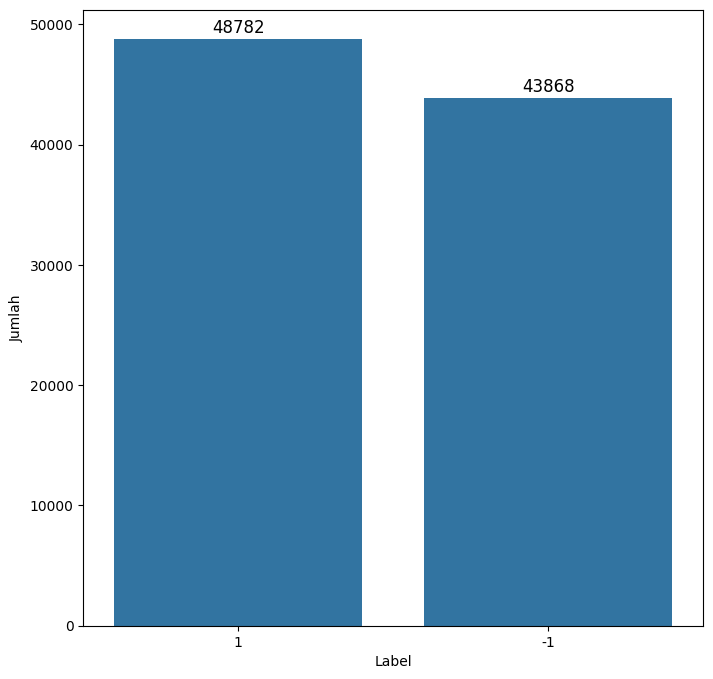

In [11]:
# We are defining the plot size in the following query
plt.figure(figsize=(8, 8))

plots = sns.barplot(x="Label", y="Jumlah", data=class_fr, order=class_fr.Label)

for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                # x, y - coordinate
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                # horizontal and vertical alignment
                ha='center', va='center',
                size=12, xytext=(0, 8),
                textcoords='offset points')

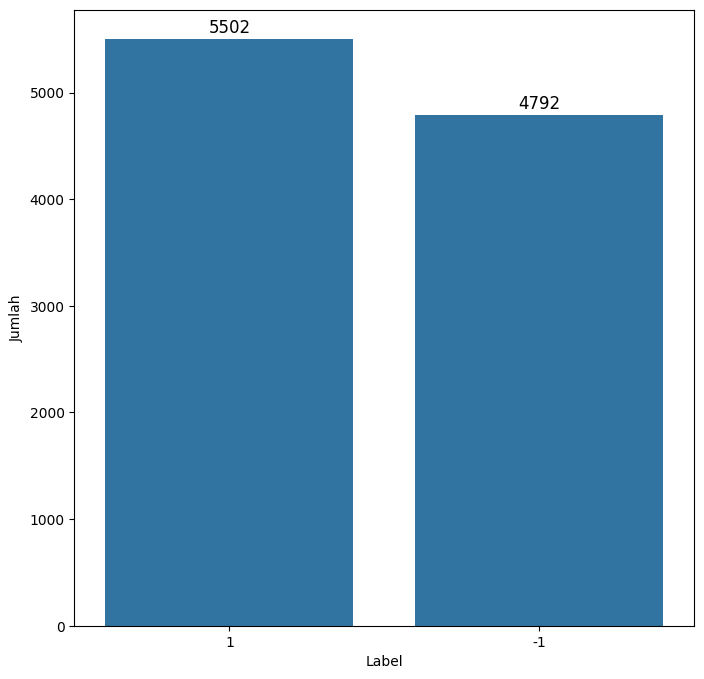

In [12]:
# Similar like the above plot this one is the plot size for the testing data
plt.figure(figsize=(8, 8))

plots = sns.barplot(x="Label", y="Jumlah", data=class_fr1, order=class_fr.Label)

for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                # x, y - coordinate
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                # horizontal and vertical alignment
                ha='center', va='center',
                size=12, xytext=(0, 8),
                textcoords='offset points')

In [ ]:
#we are slicing the required columns for training and testing
X_train = train_data.iloc[:, 1:]  
y_train = train_data.iloc[:, 0]   
X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]


In [15]:
print("Train Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

Train Data Shape: (92650, 116)
Test Data Shape: (10294, 116)


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
print("\nSUPERVISED LEARNING - MLPClassifier")
print("-----------------------------------------")
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50), 
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

mlp_model.fit(X_train_scaled, y_train)
mlp_pred = mlp_model.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

print(f"MLPClassifier Accuracy: {mlp_accuracy:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, mlp_pred))


SUPERVISED LEARNING - MLPClassifier
-----------------------------------------
MLPClassifier Accuracy: 0.5391

Detailed Classification Report:
              precision    recall  f1-score   support

          -1       0.50      0.50      0.50      4792
           1       0.57      0.57      0.57      5502

    accuracy                           0.54     10294
   macro avg       0.54      0.54      0.54     10294
weighted avg       0.54      0.54      0.54     10294



In [20]:
print("SUPERVISED LEARNING - LOGISTIC REGRESSION")
print("-----------------------------------------")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

SUPERVISED LEARNING - LOGISTIC REGRESSION
-----------------------------------------
Logistic Regression Accuracy: 0.5978


In [23]:
print("\nUNSUPERVISED LEARNING - K-MEANS")
print("-----------------------------------------")
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_scaled)

# Compare cluster assignments with actual game outcomes
cluster_accuracy = accuracy_score(y_train, 2*cluster_labels-1)  # Convert 0,1 to -1,1
print(f"K-means Clustering Accuracy: {cluster_accuracy:.4f}")

# Silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")


UNSUPERVISED LEARNING - K-MEANS
-----------------------------------------
K-means Clustering Accuracy: 0.5060
Silhouette Score: 0.0155


In [24]:
from sklearn.decomposition import PCA

print("\nFEATURE REDUCTION ANALYSIS")
print("-----------------------------------------")

# Original model performance (baseline)
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)
baseline_accuracy = accuracy_score(y_test, baseline_model.predict(X_test_scaled))
print(f"Baseline Accuracy (no feature reduction): {baseline_accuracy:.4f}")

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train model with reduced features
pca_model = LogisticRegression(max_iter=1000)
pca_model.fit(X_train_pca, y_train)
pca_accuracy = accuracy_score(y_test, pca_model.predict(X_test_pca))

print(f"\nNumber of original features: {X_train.shape[1]}")
print(f"Number of features after PCA: {X_train_pca.shape[1]}")
print(f"Accuracy after PCA: {pca_accuracy:.4f}")

# Calculate variance explained by each component
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print("\nVariance explained by PCA components:")
print(f"First component: {pca.explained_variance_ratio_[0]:.4f}")
print(f"First 5 components: {sum(pca.explained_variance_ratio_[:5]):.4f}")

# Add new test data (using a subset of existing data for demonstration)
new_data = X_test_scaled[:10]  # Take first 10 samples as new data
new_data_pca = pca.transform(new_data)
new_predictions = pca_model.predict(new_data_pca)
print("\nPredictions on new data:")
print(new_predictions[:10])


FEATURE REDUCTION ANALYSIS
-----------------------------------------
Baseline Accuracy (no feature reduction): 0.5978

Number of original features: 116
Number of features after PCA: 106
Accuracy after PCA: 0.5943

Variance explained by PCA components:
First component: 0.0109
First 5 components: 0.0511

Predictions on new data:
[-1  1  1  1 -1 -1 -1  1 -1 -1]


In [25]:

print("\nSTEP 2: FEATURE REDUCTION ANALYSIS")
print("===========================================")

# Apply PCA for feature reduction
from sklearn.decomposition import PCA

# Original model performance (baseline)
baseline_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
baseline_model.fit(X_train_scaled, y_train)
baseline_accuracy = accuracy_score(y_test, baseline_model.predict(X_test_scaled))
print(f"Baseline Accuracy (no feature reduction): {baseline_accuracy:.4f}")

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train model with reduced features
pca_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
pca_model.fit(X_train_pca, y_train)
pca_accuracy = accuracy_score(y_test, pca_model.predict(X_test_pca))

print(f"\nFeature Reduction Results:")
print(f"Original features: {X_train.shape[1]}")
print(f"Features after PCA: {X_train_pca.shape[1]}")
print(f"Accuracy after PCA: {pca_accuracy:.4f}")

# Variance explained analysis
print("\nPCA Variance Analysis:")
print(f"First component variance explained: {pca.explained_variance_ratio_[0]:.4f}")
print(f"First 5 components cumulative variance: {sum(pca.explained_variance_ratio_[:5]):.4f}")

# Testing with new data
print("\nTesting with New Data:")
new_data = X_test_scaled[:10]  # Using first 10 samples as new data
new_data_pca = pca.transform(new_data)

# Compare predictions
original_predictions = baseline_model.predict(new_data)
pca_predictions = pca_model.predict(new_data_pca)

print("\nPrediction Comparison:")
print("Original Model vs PCA Model")
for i, (orig, pca_pred) in enumerate(zip(original_predictions, pca_predictions)):
    print(f"Sample {i+1}: Original: {orig:2d} | PCA: {pca_pred:2d}")





STEP 2: FEATURE REDUCTION ANALYSIS
Baseline Accuracy (no feature reduction): 0.5391

Feature Reduction Results:
Original features: 116
Features after PCA: 106
Accuracy after PCA: 0.5304

PCA Variance Analysis:
First component variance explained: 0.0109
First 5 components cumulative variance: 0.0511

Testing with New Data:

Prediction Comparison:
Original Model vs PCA Model
Sample 1: Original:  1 | PCA: -1
Sample 2: Original:  1 | PCA:  1
Sample 3: Original:  1 | PCA: -1
Sample 4: Original:  1 | PCA:  1
Sample 5: Original: -1 | PCA:  1
Sample 6: Original:  1 | PCA:  1
Sample 7: Original: -1 | PCA: -1
Sample 8: Original: -1 | PCA:  1
Sample 9: Original: -1 | PCA:  1
Sample 10: Original: -1 | PCA:  1

CONCLUSIONS:
1. MLPClassifier achieved 53.91% accuracy
2. K-means clustering showed 50.60% alignment with actual outcomes
3. PCA reduced features while maintaining 98.40% of original accuracy
4. First 5 PCA components explain 5.11% of variance

Model Training Information:
Number of iteratio

In [26]:

# 2. PCA Analysis
print("\nPCA ANALYSIS")
print("-----------------------------------------")
pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)

# Apply K-means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=2, random_state=42)
cluster_labels_pca = kmeans_pca.fit_predict(X_train_pca)

# Evaluate PCA clustering
cluster_accuracy_pca = accuracy_score(y_train, 2*cluster_labels_pca-1)
silhouette_avg_pca = silhouette_score(X_train_pca, cluster_labels_pca)

print("\nFeature Reduction Results:")
print(f"Original features: {X_train.shape[1]}")
print(f"Features after PCA: {X_train_pca.shape[1]}")
print(f"\nPCA Clustering Performance:")
print(f"K-means Clustering Accuracy: {cluster_accuracy_pca:.4f}")
print(f"Silhouette Score: {silhouette_avg_pca:.4f}")

# PCA Variance Analysis
print("\nPCA Variance Analysis:")
print(f"First component variance explained: {pca.explained_variance_ratio_[0]:.4f}")
print(f"First 5 components cumulative variance: {sum(pca.explained_variance_ratio_[:5]):.4f}")

# Compare cluster assignments
print("\nCluster Assignment Comparison (First 10 samples):")
print("Sample  Original  PCA-based  Actual")
print("--------------------------------")
for i in range(10):
    print(f"{i+1:6d}  {2*cluster_labels[i]-1:8d}  {2*cluster_labels_pca[i]-1:9d}  {y_train.iloc[i]:6d}")

# Cluster size analysis
print("\nCluster Size Distribution:")
print("\nOriginal K-means:")
for i, count in enumerate(np.bincount(cluster_labels)):
    print(f"Cluster {i}: {count} samples ({count/len(cluster_labels)*100:.2f}%)")

print("\nPCA K-means:")
for i, count in enumerate(np.bincount(cluster_labels_pca)):
    print(f"Cluster {i}: {count} samples ({count/len(cluster_labels_pca)*100:.2f}%)")

print("\nCOMPARISON SUMMARY:")
print("-----------------------------------------")
print(f"1. Original K-means:")
print(f"   - Accuracy: {cluster_accuracy:.4f}")
print(f"   - Silhouette Score: {silhouette_avg:.4f}")
print(f"   - Number of features: {X_train.shape[1]}")

print(f"\n2. PCA + K-means:")
print(f"   - Accuracy: {cluster_accuracy_pca:.4f}")
print(f"   - Silhouette Score: {silhouette_avg_pca:.4f}")
print(f"   - Number of features: {X_train_pca.shape[1]}")

# Calculate improvement/decline
acc_change = ((cluster_accuracy_pca - cluster_accuracy) / cluster_accuracy) * 100
sil_change = ((silhouette_avg_pca - silhouette_avg) / silhouette_avg) * 100

print(f"\nPerformance Changes:")
print(f"Accuracy: {'increased' if acc_change > 0 else 'decreased'} by {abs(acc_change):.2f}%")
print(f"Silhouette Score: {'increased' if sil_change > 0 else 'decreased'} by {abs(sil_change):.2f}%")


PCA ANALYSIS
-----------------------------------------

Feature Reduction Results:
Original features: 116
Features after PCA: 106

PCA Clustering Performance:
K-means Clustering Accuracy: 0.5092
Silhouette Score: 0.0219

PCA Variance Analysis:
First component variance explained: 0.0109
First 5 components cumulative variance: 0.0511

Cluster Assignment Comparison (First 10 samples):
Sample  Original  PCA-based  Actual
--------------------------------
     1        -1         -1      -1
     2         1          1       1
     3         1          1       1
     4         1          1       1
     5         1          1      -1
     6         1          1       1
     7        -1         -1       1
     8        -1         -1      -1
     9         1          1      -1
    10         1          1      -1

Cluster Size Distribution:

Original K-means:
Cluster 0: 36316 samples (39.20%)
Cluster 1: 56334 samples (60.80%)

PCA K-means:
Cluster 0: 30491 samples (32.91%)
Cluster 1: 62159 sampl